# Content-based filtering for movie recommendation

## Importing pre-processed data

In [1]:
import pandas as pd

### Movie information

In [2]:
movies_df = pd.read_csv("data/ml-latest-small-preprocessed/movies.csv")

movies_df.head()

,movieId,title,year_1980s,year_1990.0-1994.0,year_1995.0-1999.0,year_2000.0-2004.0,year_2005.0-2009.0,year_2010.0-2014.0,year_2015+,year_pre-1980,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Ratings information

In [3]:
ratings_df = pd.read_csv("data/ml-latest-small-preprocessed/ratings.csv")

ratings_df.head()

,userId,movieId,rating,timestamp,percentile,relevant
0,1,1,0.777778,964982703,0.518238,0
1,1,3,0.777778,964981247,0.518238,0
2,1,6,0.777778,964982224,0.518238,0
3,1,47,1.000000,964983815,0.868995,1
4,1,50,1.000000,964982931,0.868995,1


## Content-based filtering

### Evaluation suite

In [4]:
import pandas as pd
from pandas import DataFrame
from typing import Iterable

from recommender.normalization import normalize_ratings
from recommender.content_based_filtering import create_user_profiles, get_all_recommendations
from recommender.evaluation import count_recommendations, evaluation

def test_one_split(ratings_train: DataFrame, 
                   ratings_test: DataFrame, 
                   movies_df: DataFrame,
                   features: Iterable,
                   k_values: Iterable = [5,10]) -> DataFrame:
    
    ratings_train_norm = normalize_ratings(ratings_train)
    user_profiles, user_counts = create_user_profiles(ratings_train_norm, movies_df, features)
    # user_profiles, user_counts = create_user_profiles(ratings_train, movies_df, features)
    
    
    all_recommendations = get_all_recommendations(
        user_profiles,
        user_counts,
        movies_df,
        ratings_train,
        ratings_test,
        features
    )
    
    rec_counts = count_recommendations(all_recommendations, k=5)
    
    eval_results = evaluation(
        all_recommendations,
        ratings_test, 
        k_values
    )
    
    return eval_results, rec_counts
    

### (Stratified) k-fold cross validation suite

#### Parameters

In [5]:
n_splits = 10
features = list(set(movies_df.columns) - set(["movieId", "title"]))
k_values = list(range(1,11))

#### K-fold CV

In [6]:
from recommender.stratified_kfold import stratified_kfold_split
from recommender.normalization import normalize_movie_features

splits = stratified_kfold_split(ratings_df, 
                                target_column = "userId",
                                n_splits = n_splits,
                                shuffle = True,
                                random_state = 1337)

normalized_movies_df = normalize_movie_features(movies_df, features)

results_list = []
rec_counts_list = []

for i in range(n_splits):
    print(f"Evaluating split {i}")
    ratings_train = pd.concat([splits[j] for j in range(n_splits) if j != i])
    ratings_test = splits[i]
    
    result_i, counts_i = test_one_split(ratings_train, ratings_test, normalized_movies_df, features, k_values)
    
    result_i["split"] = i
    
    results_list.append(result_i)
    rec_counts_list.append(counts_i)
    


Evaluating split 0


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


Evaluating split 1


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


Evaluating split 2


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


Evaluating split 3


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


Evaluating split 4


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


Evaluating split 5


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


Evaluating split 6


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


Evaluating split 7


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


Evaluating split 8


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


Evaluating split 9


/mnt/d/MyPath/Projects/MovieLens-Recommender - Copy/recommender/content_based_filtering.py:180: RuntimeWarning: invalid value encountered in divide
  similarities = dot_product / (feature_norms.reshape(-1, 1) * query_norm)


In [7]:
results = pd.concat(results_list, axis = 0, ignore_index = True)

results.head()

,k,precision,recall,f1_score,true_positives,false_positives,false_negatives,split
0,1,0.003279,0.000935,0.001455,2,608,2137,0
1,2,0.001639,0.000935,0.001191,2,1218,2137,0
2,3,0.001639,0.001403,0.001512,3,1827,2136,0
3,4,0.001230,0.001403,0.001310,3,2437,2136,0
4,5,0.000984,0.001403,0.001156,3,3047,2136,0


In [8]:
results.to_csv("data/content-based-filtering.csv", index = False)

In [9]:
total_rec_counts = pd.concat(rec_counts_list, axis=1).fillna(0).sum(axis=1)

rec_counts_df = pd.DataFrame({
    'movieId': total_rec_counts.index,
    'rec_count': total_rec_counts.values
}).sort_values('rec_count', ascending=False)

rec_counts_df = rec_counts_df.merge(
        movies_df[['movieId', 'title']], 
        on='movieId'
    )

### Plotting results

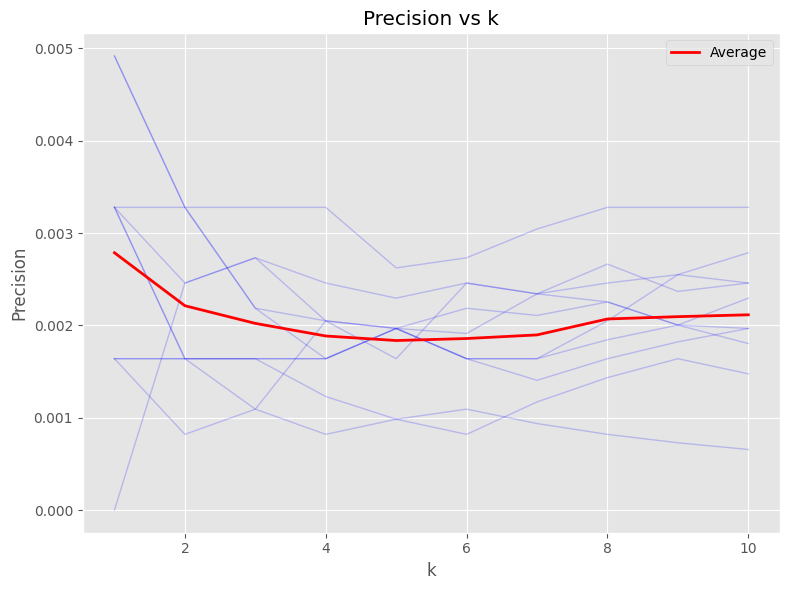

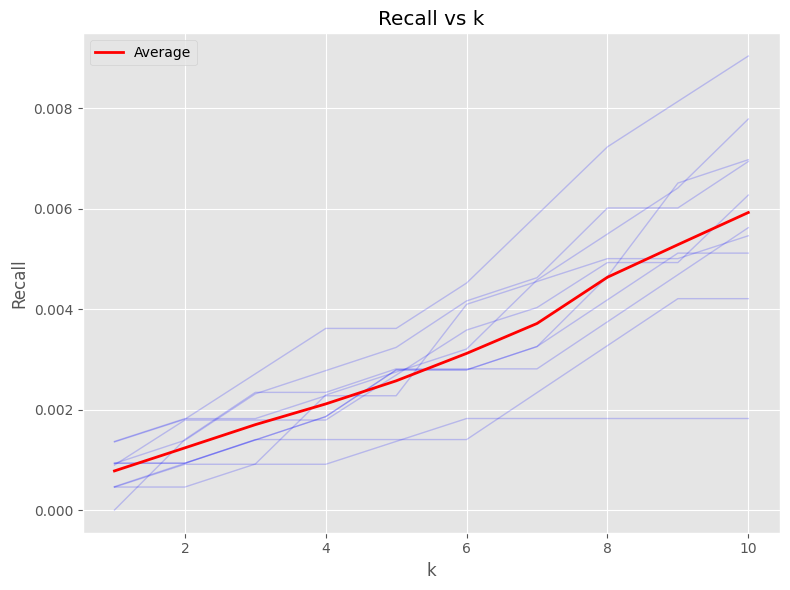

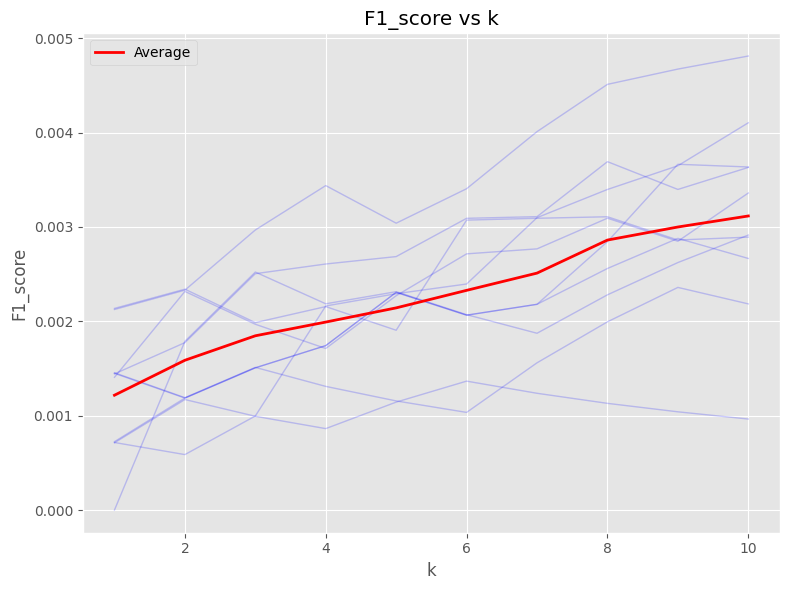


Metrics for k=5:
Precision: 0.0018 ± 0.0005
Recall: 0.0026 ± 0.0007
F1_score: 0.0021 ± 0.0006

Metrics for k=10:
Precision: 0.0021 ± 0.0007
Recall: 0.0059 ± 0.0020
F1_score: 0.0031 ± 0.0011


In [10]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('ggplot')
metrics = ['precision', 'recall', 'f1_score']

# Create separate plot for each metric
for metric in metrics:
    plt.figure(figsize=(8, 6))
    
    # Plot individual split lines (thin, transparent)
    for split in results['split'].unique():
        split_data = results[results['split'] == split]
        plt.plot(split_data['k'], split_data[metric], 
                alpha=0.2, color='blue', linewidth=1)
    
    # Plot average line (thick, solid)
    avg_by_k = results.groupby('k')[metric].mean()
    plt.plot(avg_by_k.index, avg_by_k.values, 
            linewidth=2, color='red', label='Average')
    
    plt.title(f'{metric.capitalize()} vs k')
    plt.xlabel('k')
    plt.ylabel(metric.capitalize())
    plt.grid(True)
    plt.legend()
    
    # Optional: Adjust layout and save
    plt.tight_layout()
    # plt.savefig(f'{metric}_vs_k.png', dpi=300, bbox_inches='tight')
    plt.show()

# Print metrics for k=5 and k=10
for k in [5, 10]:
    print(f"\nMetrics for k={k}:")
    k_results = results[results['k'] == k]
    for metric in metrics:
        mean_val = k_results[metric].mean()
        std_val = k_results[metric].std()
        print(f"{metric.capitalize()}: {mean_val:.4f} ± {std_val:.4f}")

### Plotting recommendation distribution

Recommendation Statistics:
count    5864.000000
mean        5.201228
std         6.546134
min         1.000000
25%         1.000000
50%         3.000000
75%         6.000000
max       100.000000
Name: rec_count, dtype: float64


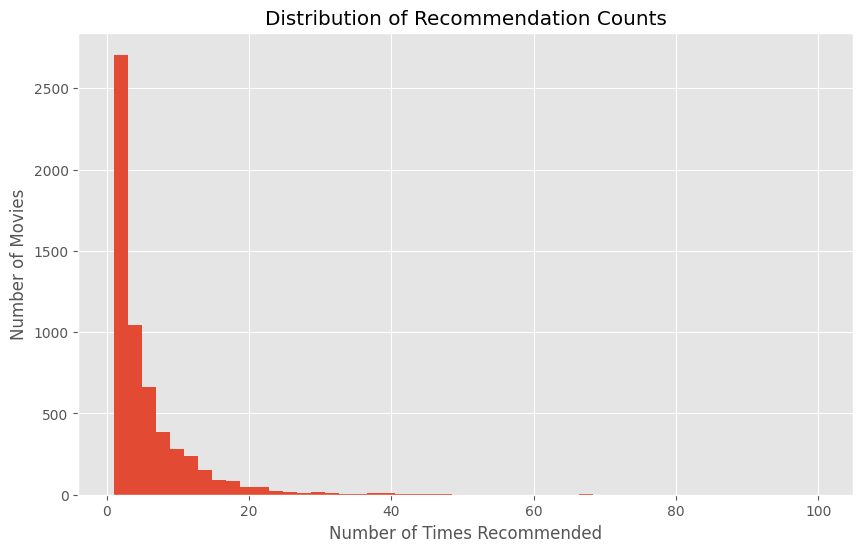


Top 10 Most Recommended Movies:
   movieId  rec_count                                              title
0   176601      100.0                                       Black Mirror
1   171891       73.0                                  Generation Iron 2
2   171495       71.0                                             Cosmos
3   171631       69.0                            Maria Bamford: Old Baby
4   171749       68.0                  Death Note: Desu nôto (2006–2007)
5   156605       67.0                                           Paterson
6   147250       66.0  The Adventures of Sherlock Holmes and Doctor W...
7   167570       62.0                                             The OA
8   143410       60.0                                         Hyena Road
9   149330       55.0                          A Cosmic Christmas (1977)


In [11]:
print("Recommendation Statistics:")
print(rec_counts_df['rec_count'].describe())

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(rec_counts_df['rec_count'], bins=50)
plt.title('Distribution of Recommendation Counts')
plt.xlabel('Number of Times Recommended')
plt.ylabel('Number of Movies')
plt.show()

# Show top 10 most recommended movies
print("\nTop 10 Most Recommended Movies:")
print(rec_counts_df.head(10))

### Usage example

In [14]:
from recommender.stratified_kfold import stratified_kfold_split
from recommender.content_based_filtering import get_recommendations

def user_id_recommend(user_id: int, 
                      ratings_df: DataFrame,
                      movies_df: DataFrame,
                      features: Iterable,
                      k: int = 5):
    """
    Demonstrate recommendations for a user by specifying user_id
    
    Parameters:
    - user_id: ID of the user to get recommendations for
    - ratings_df: Complete ratings DataFrame
    - movies_df: Movies DataFrame
    - features: List of feature columns to use
    - k: Number of recommendations to show
    """
    # Get one split from stratified k-fold
    splits = stratified_kfold_split(ratings_df, 'userId', n_splits=5, shuffle=True, random_state=42)
    train_ratings = pd.concat([splits[i] for i in range(1, 5)])
    
    # Get user's actual ratings
    user_ratings = ratings_df[ratings_df['userId'] == user_id]
    print(f"\nUser {user_id}'s top rated movies:")
    top_rated = user_ratings.nlargest(5, 'rating')
    for _, row in top_rated.iterrows():
        movie_title = movies_df[movies_df['movieId'] == row['movieId']]['title'].iloc[0]
        print(f"- {movie_title} (Rating: {row['rating']:.1f})")
    
    # Generate recommendations
    train_ratings_norm = normalize_ratings(train_ratings)
    
    user_profiles, user_counts = create_user_profiles(train_ratings_norm, 
                                                    movies_df, 
                                                    features)
    
    # Get recommendations
    watched_movies = set(user_ratings['movieId'])
    recommendations = get_recommendations(
        user_id,
        user_profiles,
        user_counts,
        movies_df,
        features,
        exclude_movies=watched_movies
    )
    
    print(f"\nTop {k} recommended movies:")
    top_k_recs = recommendations.head(k)
    for _, row in top_k_recs.iterrows():
        movie_title = movies_df[movies_df['movieId'] == row['movieId']]['title'].iloc[0]
        print(f"- {movie_title} (Similarity: {row['similarity_score']:.3f})")

In [15]:
user_id_recommend(user_id=69,
                  ratings_df=ratings_df,
                  movies_df=movies_df,
                  features=features,
                  k=5)


User 69's top rated movies:
- Usual Suspects, The (1995) (Rating: 1.0)
- Star Wars: Episode IV - A New Hope (1977) (Rating: 1.0)
- Pulp Fiction (1994) (Rating: 1.0)
- Shawshank Redemption, The (1994) (Rating: 1.0)
- Tommy Boy (1995) (Rating: 1.0)

Top 5 recommended movies:
- ¡Three Amigos! (1986) (Similarity: 0.486)
- Young Guns (1988) (Similarity: 0.455)
- They Call Me Trinity (1971) (Similarity: 0.428)
- Blazing Saddles (1974) (Similarity: 0.428)
- Scalphunters, The (1968) (Similarity: 0.428)
